In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Resources/scatter_data.csv')
df = pd.get_dummies(df)
df.head()

,GDP (Billions),Gold Medals,Gold Medals Male,Gold Medals Female
0,427,18,5,13
1,8560,56,27,29
2,259,6,2,4
3,358,6,5,1
4,374,0,0,0


In [4]:
df = df.dropna()
df.dtypes

GDP (Billions)        int64
Gold Medals           int64
Gold Medals Male      int64
Gold Medals Female    int64
dtype: object

In [5]:
X = df.drop('Gold Medals',axis = 1)
y = df['Gold Medals']

In [35]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

GDP (Billions)


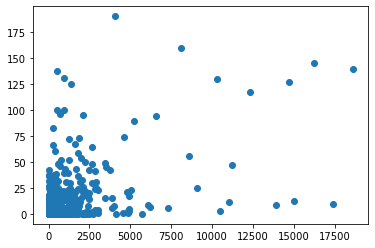

Gold Medals Male


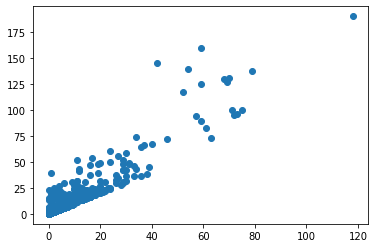

Gold Medals Female


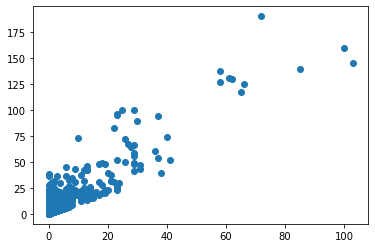

In [21]:
for col in X.columns:
    print(col)
    plt.scatter(X[col], y)
    plt.show()

[5.93852763e-16 1.00000000e+00 1.00000000e+00]


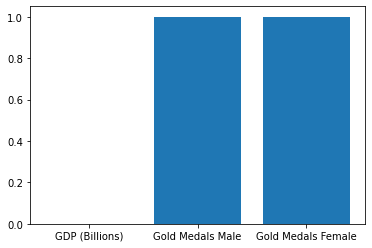

In [22]:
#Linear Regression
#Observations: linear regression here is not best for calcuting r^2 values. 

reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)

plt.bar(X.columns, reg.coef_)
plt.show()

[1.09913281e-04 9.95934584e-01 9.69250385e-01]


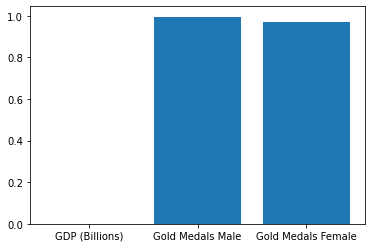

In [23]:
#Lasso Regression 
#If there are two or more highly collinear variables, then LASSO selects one of them randomly. This is usually not good for the interpretation of the data. 

reg = Lasso(max_iter=10000).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

[6.11176858e-06 9.99767271e-01 9.98307674e-01]


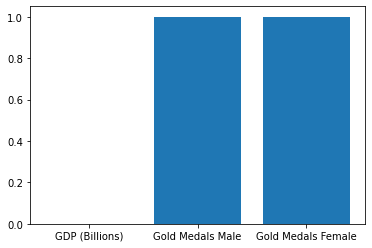

In [24]:
#Ridge Regression
#Ridge Regression performs better with variables with high colinearity. 

reg = Ridge(alpha=100).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

[1.08708482e-04 9.95478669e-01 9.70117812e-01]


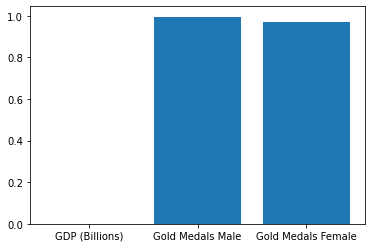

In [16]:
#ElasticNet Regression: hybrid of lasso and ridge regression

from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=1).fit(X_train, y_train) #alpha equal to 1 
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

In [21]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()  

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [24]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C= 80, epsilon=0.6), data)

Model: LinearRegression
Train score: 1.0
Test Score: 1.0

Model: KNeighborsRegressor
Train score: 0.9799863135649607
Test Score: 0.9912884425323821

Model: RandomForestRegressor
Train score: 0.9970755686097019
Test Score: 0.9908651232017759

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.9983409124259425

Model: AdaBoostRegressor
Train score: 0.9134031841919561
Test Score: 0.8324825975212458

Model: SVR
Train score: 0.99174889121048
Test Score: 0.9236901854560923



In [ ]:
#Observations: 
# 1) higher C corresponds to large R2 value in SVR. 
# 2) An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.
